In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

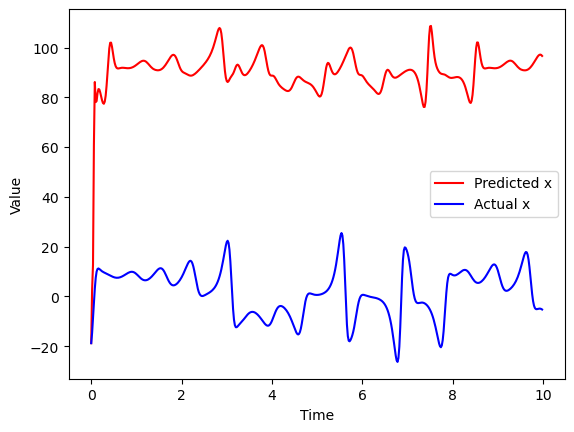

In [4]:
n = 300             # Number of neurons
m = 3               # Number of dimensions

dt = 0.02
tf_training = 100     # Training from 0 to 100
steps_training = int(tf_training/dt)

mu = 1.2
lam = 10^(-6)
alpha = 0.6

A1 = sp.random(n, n, density=6/n, format='csr')
A1 = A1 - 0.5 * np.sign(A1.toarray())
A1 = A1 * mu / np.abs(sp.linalg.eigs(A1, k=1)[0])  # normalize reservoir matrix
A = sp.csr_matrix(A1)

Win = 0.01 * (2.0 * np.random.rand(n, m) - 1)

x = np.zeros((m, steps_training))
r = np.zeros((n, steps_training))

x[:, 0] = np.array([-2.9708, -5.1844, 12.1317])
r[:, 0] = 0.5 - 1.0 * np.random.rand(n)

for t in range(1, steps_training):
    xdot = np.array([10 * (x[1, t - 1] - x[0, t - 1]),
                     x[0, t - 1]* (28 - x[2, t - 1]) - x[1, t - 1],
                     x[0, t - 1] * x[1, t - 1] - 2.66667 * x[2, t - 1]])
    
    x[:, t] = x[:, t - 1] + dt * xdot

    r[:, t] = (1-alpha) * r[:, t - 1] + alpha * np.tanh(A.dot(r[:, t - 1]) + Win.dot(x[:, t - 1]) + np.ones(n))

Wout = (((np.linalg.inv(r.dot(r.T) + lam * np.eye(n))).dot(r)).dot(x.T)).T
tf_test = 60
steps_test = int(tf_test/dt)
x_pred = np.zeros((m, steps_test))
x_act = np.zeros((m, steps_test))
r_test = np.zeros((n, steps_test))

x_act[:, 0] = x[:, -1]
x_pred[:, 0] = x[:, -1]
r_test[:, 0] = r[:, -1]
for t in range(1, steps_test):
    xdot = np.array([10 * (x_act[1, t - 1] - x_act[0, t - 1]),
                     x_act[0, t - 1]* (28 - x_act[2, t - 1]) - x_act[1, t - 1],
                     x_act[0, t - 1] * x_act[1, t - 1] - 2.66667 * x_act[2, t - 1]])
    
    x_act[:, t] = x_act[:, t - 1] + dt * xdot
    
    r_test[:, t] = (1-alpha) * r[:, t - 1] + alpha * np.tanh(A.dot(r_test[:, t - 1]) + Win.dot(x_pred[:, t - 1]) + np.ones(n))
    x_pred[:, t] = Wout.dot(r_test[:, t])

time = dt * np.arange(steps_test)

plt.figure()
plt.plot(time[0:500], x_pred[1, 0:500], 'r-', label='Predicted x')
plt.plot(time[0:500], x_act[1, 0:500],'b-', label='Actual x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
A.dot(r_test[:, 30])

In [ ]:
Win.shape

In [ ]:
r_test[:, 30].shape

In [ ]:
Win.dot(x_pred[:, 30]).shape

In [ ]:
(A.dot(r_test[:, 54]) + Win.dot(x_pred[:, 54]) + np.ones(n))